In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib


In [2]:
data = pd.read_csv('./data/creaditcard_fraud_data.csv')
data

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


* trans_date_trans_time (object): 거래가 발생한 날짜 및 시간
* cc_num (int64): 사용된 신용카드 번호를 나타내는 숫자
* merchant (object): 상점명 또는 거래가 발생한 가맹점의 이름
* category (object): 거래가 발생한 상품 또는 서비스의 범주
* amt (float64): 해당 거래의 거래 금액
* first (object): 카드 소유자의 **이름
* last (object): 카드 소유자의 성
* gender (object): 카드 소유자의 성별
* street (object): 카드 소유자의 거주지 주소의 거리
* city (object): 카드 소유자의 거주지 도시
* state (object): 카드 소유자의 거주지 주(State)
* zip (int64): 카드 소유자의 거주지 우편번호
* lat (float64): 카드 소유자의 거주지 위도(latitude)
* long (float64): 카드 소유자의 거주지 경도(longitude)
* city_pop (int64): 카드 소유자가 거주하는 도시의 인구 수
* job (object): 카드 소유자의 직업
* dob (object): 카드 소유자의 출생일(Date of Birth)
* trans_num (object): 각 거래에 할당된 고유 거래 번호
* unix_time (int64): 거래가 발생한 시간을 유닉스 타임스탬프 형식으로 나타낸 값
* merch_lat (float64): 가맹점의 위도(latitude) 거래가 발생한 상점의 위치 정보
* merch_long (float64): 가맹점의 경도(longitude)
* is_fraud (int64): 거래가 사기(fraud)여부를 나타내는 열입니다. 1은 사기, 0은 정상 거래

## 순서
  1. 데이터 전처리(결측값, 이상값)
  2. EDA
  3. Feature Engineering
  4. Feature Selection
  5. 데이터 분할
  6. k-fold 교차검증, gridsearch, randomsearch, 데이터 증폭 pipline을 이용해서 모델 3가지로 비교 분석

## EDA

1. 데이터의 기본 정보 파악
    * 데이터의 크기(행과 열의 수), 각 열의 데이터 타입, 결측치 여부 등을 확인합니다.
    * df.info() 또는 df.describe() 같은 함수로 데이터셋을 탐색합니다.

2. 결측치 및 이상치 처리
    * 결측치가 있는지 확인하고, 이를 어떻게 처리할지 결정합니다(삭제, 평균값으로 대체 등).
    * 이상치(outlier)도 탐색하고 분석에 방해가 되는지 확인합니다.

3. 데이터 분포 확인
    * 각 변수(열)의 분포를 시각화해 데이터의 구조를 파악합니다. 히스토그램, 박스 플롯(Boxplot) 등을 사용하여 값들이 어떻게 분포하는지 확인합니다.
    * 예: sns.histplot(data['column_name'])

4. 변수 간의 상관관계 분석
    * 상관 행렬(correlation matrix)을 통해 변수들 간의 관계를 확인합니다. 이는 회귀 분석이나 모델 학습 시 중요한 변수 선택에 도움을 줍니다.
    * 예: df.corr(), sns.heatmap(df.corr())

5. 범주형 데이터 분석
    * 범주형 데이터(카테고리컬 데이터)는 막대 그래프(Bar Plot)나 파이 차트(Pie Chart)를 통해 시각화합니다.
    * 범주별 빈도수를 확인해보고, 분석의 주요 요인으로 작용할 수 있는지를 파악합니다.

6. 이상치 탐지
    * 박스 플롯 등을 통해 각 변수에서 극단적인 값(이상치)을 탐지하고, 이를 어떻게 처리할지 결정합니다.

7. 특성 분포 분석
    * 숫자형 변수의 경우, 히스토그램 등을 통해 값이 정규 분포를 따르는지 확인합니다.
    * 비정규 분포의 경우 로그 변환 또는 스케일링을 적용할 수도 있습니다.

8. 데이터 시각화
    * 시각화를 통해 데이터를 더 직관적으로 파악할 수 있습니다. 예를 들어, 산점도(Scatter Plot)로 변수 간의 관계를 확인하거나, 트렌드를 찾기 위해 시간에 따른 변화를 시각화할 수 있습니다.

9. 도메인 지식 활용
    * 데이터의 각 열이 실제로 무엇을 의미하는지, 그 값들이 실질적으로 어떤 정보를 담고 있는지를 이해하는 것이 중요합니다.

## Feature Engineering(특성 공학)은 모델 성능을 향상
* 특성 생성 (Feature Creation)
* 특성 변환 (Feature Transformation)
* 특성 선택 (Feature Selection)
* 범주형 변수 처리 (Categorical Encoding):
* 결측값 처리 (Handling Missing Values):
* 특성 상호작용 (Feature Interaction):

In [3]:
data.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

In [5]:
pd.options.display.float_format = '{:.6f}'.format

In [6]:
data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000
mean,417386038393710400.000000,70.063567,48813.258191,38.539311,-90.227832,88643.674509,1358674218.834364,38.538976,-90.227940,0.005210
std,1309115265318734848.000000,159.253975,26881.845966,5.071470,13.747895,301487.618344,18195081.387560,5.105604,13.759692,0.071992
min,60416207185.000000,1.000000,1257.000000,20.027100,-165.672300,23.000000,1325376018.000000,19.027422,-166.671575,0.000000
25%,180042946491150.000000,9.640000,26237.000000,34.668900,-96.798000,741.000000,1343016823.750000,34.740122,-96.899440,0.000000
50%,3521417320836166.000000,47.450000,48174.000000,39.354300,-87.476900,2443.000000,1357089331.000000,39.368900,-87.440694,0.000000
75%,4642255475285942.000000,83.100000,72042.000000,41.940400,-80.158000,20328.000000,1374581485.250000,41.956263,-80.245108,0.000000
max,4992346398065154048.000000,28948.900000,99921.000000,66.693300,-67.950300,2906700.000000,1388534374.000000,67.510267,-66.950902,1.000000


<Axes: >

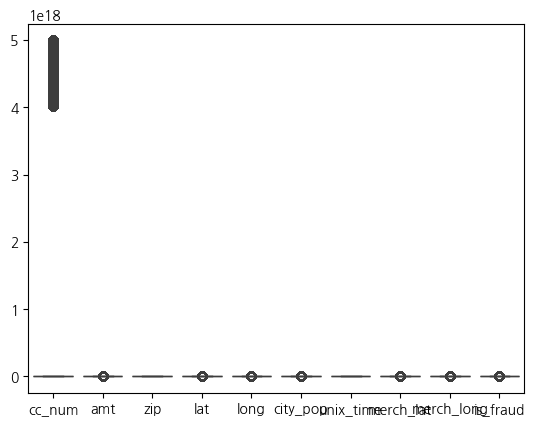

In [7]:
sns.boxplot(data)

<Axes: >

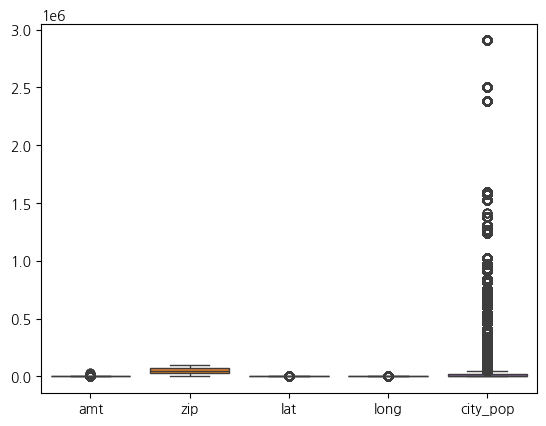

In [8]:
sns.boxplot(data[['amt', 'zip', 'lat', 'long', 'city_pop']])

<Axes: >

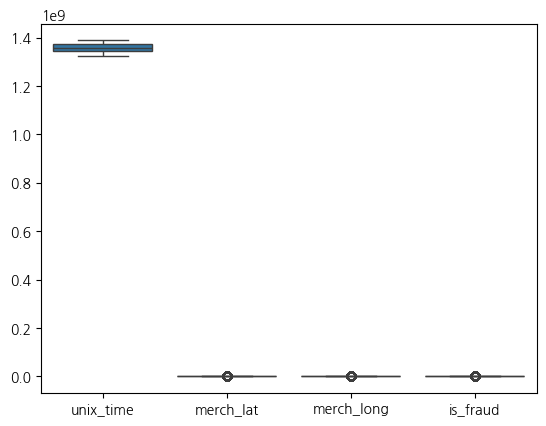

In [9]:
sns.boxplot(data[['unix_time', 'merch_lat', 'merch_long', 'is_fraud']])

In [10]:
data['cc_num'].describe()

count               1852394.000000
mean     417386038393710400.000000
std     1309115265318734848.000000
min             60416207185.000000
25%         180042946491150.000000
50%        3521417320836166.000000
75%        4642255475285942.000000
max     4992346398065154048.000000
Name: cc_num, dtype: float64

In [11]:
data['city_pop']

0            3495
1             149
2            4154
3            1939
4              99
            ...  
1852389       519
1852390     28739
1852391      3684
1852392       129
1852393    116001
Name: city_pop, Length: 1852394, dtype: int64

In [12]:
Q1 = data['city_pop'].quantile(0.25)  # 1사분위수
Q3 = data['city_pop'].quantile(0.75)  # 3사분위수
IQR = Q3 - Q1  # IQR 계산

# IQR 방식으로 이상치 제거
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치를 제거한 데이터
data_cleaned = data[(data['city_pop'] >= lower_bound) & (data['city_pop'] <= upper_bound)]

In [13]:
data_cleaned

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852388,2020-12-31 23:58:34,3523843138706408,"fraud_Prosacco, Kreiger and Kovacek",home,17.000000,Grace,Williams,F,28812 Charles Mill Apt. 628,Plantersville,...,32.617600,-86.947500,1412,Drilling engineer,1970-11-20,6d04313bfe4b661b8ca2b6a499a320fe,1388534314,32.164145,-87.539669,0
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.770000,Michael,Olson,M,558 Michael Estates,Luray,...,40.493100,-91.891200,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.840000,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.039300,-95.440100,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.880000,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.196600,-118.901700,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0


In [14]:
data = data_cleaned

# EDA

In [15]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

C:\Users\5-04\AppData\Local\Temp\ipykernel_5160\2116271243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])


In [16]:
data['trans_date_trans_time'].describe()

count                          1506203
mean     2020-01-21 01:56:18.348903936
min                2019-01-01 00:00:18
25%         2019-07-23 12:50:44.500000
50%                2020-01-02 18:04:29
75%                2020-07-23 17:08:38
max                2020-12-31 23:59:24
Name: trans_date_trans_time, dtype: object

C:\Users\5-04\AppData\Local\Temp\ipykernel_5160\2601193513.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transaction_dayofweek'] = data['trans_date_trans_time'].dt.dayofweek


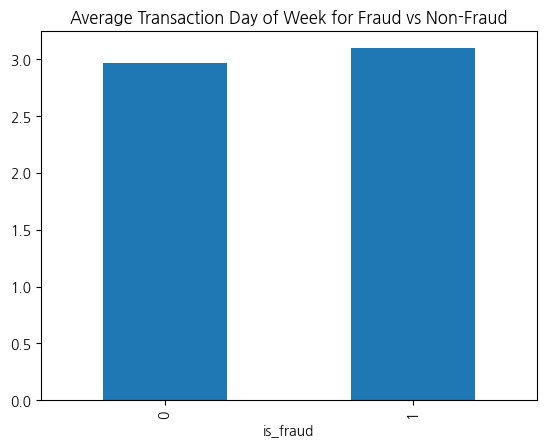

In [17]:
# 요일 추출 (0: Monday, 6: Sunday)
data['transaction_dayofweek'] = data['trans_date_trans_time'].dt.dayofweek

# 사기 거래 여부에 따른 평균 요일 계산
data.groupby('is_fraud')['transaction_dayofweek'].mean().plot(kind='bar')
plt.title('Average Transaction Day of Week for Fraud vs Non-Fraud')
plt.show()


C:\Users\5-04\AppData\Local\Temp\ipykernel_5160\2094431536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transaction_hour'] = data['trans_date_trans_time'].dt.hour


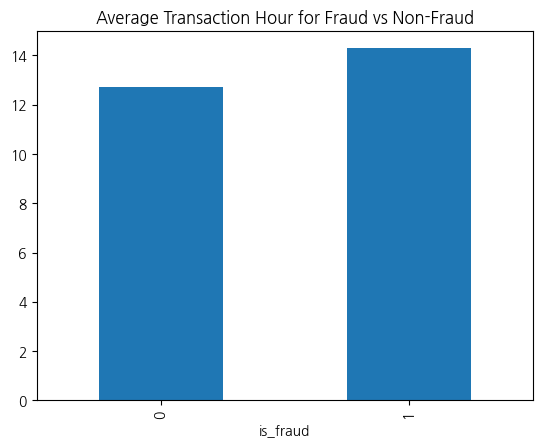

In [18]:
# 거래 시간대(hour) 추출
data['transaction_hour'] = data['trans_date_trans_time'].dt.hour

# 사기 거래 여부에 따른 시간대별 평균
data.groupby('is_fraud')['transaction_hour'].mean().plot(kind='bar')
plt.title('Average Transaction Hour for Fraud vs Non-Fraud')
plt.show()


### 상관없는 듯

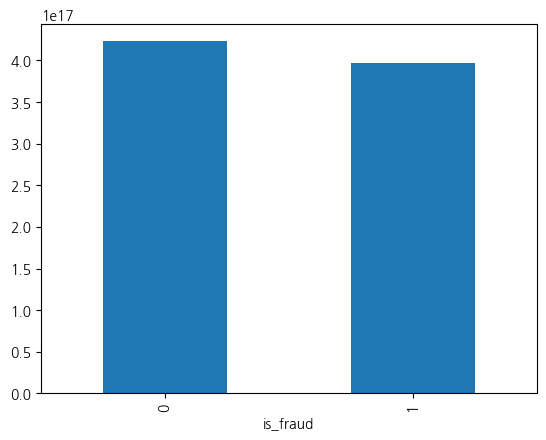

In [19]:
data.groupby('is_fraud')['cc_num'].mean().plot(kind='bar')
plt.show()

In [20]:
data.groupby(['is_fraud', 'merchant']).count()

trans_date_trans_time  cc_num  \
is_fraud merchant                                                          
0        fraud_Abbott-Rogahn                                2148    2148   
         fraud_Abbott-Steuber                               2042    2042   
         fraud_Abernathy and Sons                           2019    2019   
         fraud_Abshire PLC                                  2229    2229   
         fraud_Adams, Kovacek and Kuhlman                   1010    1010   
...                                                          ...     ...   
1        fraud_Zemlak Group                                   21      21   
         fraud_Zemlak, Tillman and Cremin                      3       3   
         fraud_Ziemann-Waters                                  7       7   
         fraud_Zieme, Bode and Dooley                          8       8   
         fraud_Zulauf LLC                                      3       3   

                                           category   amt  first  last  \
is_fraud merchant                                                        
0        fraud_Abbott-Rogahn                   2148  2148   2148  2148   
         fraud_Abbott-Steuber                  2042  2042   2042  2042   
         fraud_Abernathy and Sons              2019  2019   2019  2019   
         fraud_Abshire PLC                     2229  2229   2229  2229   
         fraud_Adams, Kovacek and Kuhlman      1010  1010   1010  1010   
...                                             ...   ...    ...   ...   
1        fraud_Zemlak Group                      21    21     21    21   
         fraud_Zemlak, Tillman and Cremin         3     3      3     3   
         fraud_Ziemann-Waters                     7     7      7     7   
         fraud_Zieme, Bode and Dooley             8     8      8     8   
         fraud_Zulauf LLC                         3     3      3     3   

                                           gender  street  city  state  ...  \
is_fraud merchant                                                       ...   
0        fraud_Abbott-Rogahn                 2148    2148  2148   2148  ...   
         fraud_Abbott-Steuber                2042    2042  2042   2042  ...   
         fraud_Abernathy and Sons            2019    2019  2019   2019  ...   
         fraud_Abshire PLC                   2229    2229  2229   2229  ...   
         fraud_Adams, Kovacek and Kuhlman    1010    1010  1010   1010  ...   
...                                           ...     ...   ...    ...  ...   
1        fraud_Zemlak Group                    21      21    21     21  ...   
         fraud_Zemlak, Tillman and Cremin       3       3     3      3  ...   
         fraud_Ziemann-Waters                   7       7     7      7  ...   
         fraud_Zieme, Bode and Dooley           8       8     8      8  ...   
         fraud_Zulauf LLC                       3       3     3      3  ...   

                                           long  city_pop   job   dob  \
is_fraud merchant                                                       
0        fraud_Abbott-Rogahn               2148      2148  2148  2148   
         fraud_Abbott-Steuber              2042      2042  2042  2042   
         fraud_Abernathy and Sons          2019      2019  2019  2019   
         fraud_Abshire PLC                 2229      2229  2229  2229   
         fraud_Adams, Kovacek and Kuhlman  1010      1010  1010  1010   
...                                         ...       ...   ...   ...   
1        fraud_Zemlak Group                  21        21    21    21   
         fraud_Zemlak, Tillman and Cremin     3         3     3     3   
         fraud_Ziemann-Waters                 7         7     7     7   
         fraud_Zieme, Bode and Dooley         8         8     8     8   
         fraud_Zulauf LLC                     3         3     3     3   

                                           trans_num  unix_time  merch_lat  \
is_fraud merchant                  

<Axes: xlabel='merchant'>

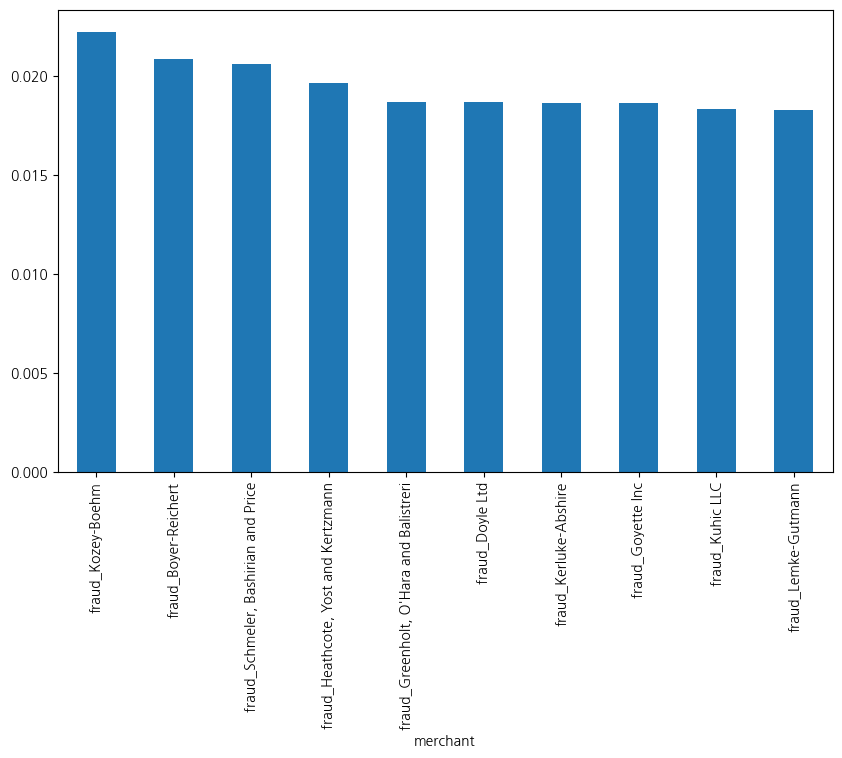

In [21]:
data.groupby('merchant')['is_fraud'].mean().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,6))

In [22]:
data.groupby(['is_fraud', 'category']).count()

trans_date_trans_time  cc_num  merchant     amt  \
is_fraud category                                                          
0        entertainment                  108721  108721    108721  108721   
         food_dining                    104604  104604    104604  104604   
         gas_transport                  159527  159527    159527  159527   
         grocery_net                     48760   48760     48760   48760   
         grocery_pos                    141470  141470    141470  141470   
         health_fitness                 100784  100784    100784  100784   
         home                           142123  142123    142123  142123   
         kids_pets                      131640  131640    131640  131640   
         misc_net                        73779   73779     73779   73779   
         misc_pos                        91223   91223     91223   91223   
         personal_care                  105831  105831    105831  105831   
         shopping_net                   111563  111563    111563  111563   
         shopping_pos                   131097  131097    131097  131097   
         travel                          47208   47208     47208   47208   
1        entertainment                     233     233       233     233   
         food_dining                       173     173       173     173   
         gas_transport                     626     626       626     626   
         grocery_net                       155     155       155     155   
         grocery_pos                      1800    1800      1800    1800   
         health_fitness                    151     151       151     151   
         home                              223     223       223     223   
         kids_pets                         263     263       263     263   
         misc_net                          949     949       949     949   
         misc_pos                          272     272       272     272   
         personal_care                     251     251       251     251   
         shopping_net                     1791    1791      1791    1791   
         shopping_pos                      853     853       853     853   
         travel                            133     133       133     133   

                          first    last  gender  street    city   state  ...  \
is_fraud category                                                        ...   
0        entertainment   108721  108721  108721  108721  108721  108721  ...   
         food_dining     104604  104604  104604  104604  104604  104604  ...   
         gas_transport   159527  159527  159527  159527  159527  159527  ...   
         grocery_net      48760   48760   48760   48760   48760   48760  ...   
         grocery_pos     141470  141470  141470  141470  141470  141470  ...   
         health_fitness  100784  100784  100784  100784  100784  100784  ...   
         home            142123  142123  142123  142123  142123  142123  ...   
         kids_pets       131640  131640  131640  131640  131640  131640  ...   
         misc_net         73779   73779   73779   73779   73779   73779  ...   
         misc_pos         91223   91223   91223   91223   91223   91223  ...   
         personal_care   105831  105831  105831  105831  105831  105831  ...   
         shopping_net    111563  111563  111563  111563  111563  111563  ...   
         shopping_pos    131097  131097  131097  131097  131097  131097  ...   
         travel           47208   47208   47208   47208   47208   47208  ...   
1        entertainment      233     233     233     233     233     233  ...   
         food_dining        173     173     173     173     173     173  ...   
         gas_transport      626     626     626     626     626     626  ...   
         grocery_net        155     155     155     155     155     155  ...   
         grocery_pos       1800    1800    1800    1800    1800    1800  ...   
         health_fitness     151     151     151     151     151 

In [23]:
data.groupby('category')['is_fraud'].mean().sort_values(ascending=False)

category
shopping_net     0.015800
misc_net         0.012699
grocery_pos      0.012564
shopping_pos     0.006465
gas_transport    0.003909
grocery_net      0.003169
misc_pos         0.002973
travel           0.002809
personal_care    0.002366
entertainment    0.002139
kids_pets        0.001994
food_dining      0.001651
home             0.001567
health_fitness   0.001496
Name: is_fraud, dtype: float64

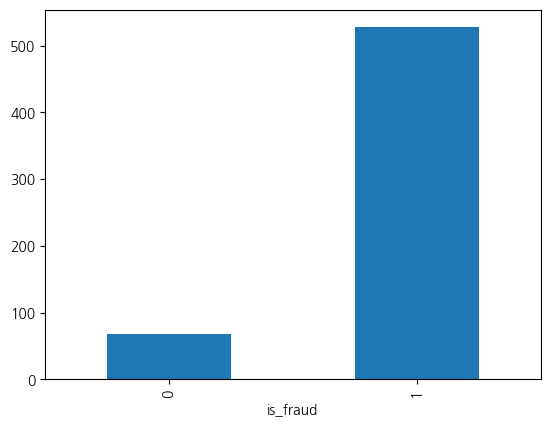

In [24]:
# 'is_fraud'에 따른 'amt'의 평균값을 계산하고 바로 시각화
data.groupby('is_fraud')['amt'].mean().plot(kind='bar')
plt.show()

In [25]:
data['first'].value_counts().head(10)

first
Christopher    32267
Robert         27794
Michael        23428
James          23402
Jennifer       21241
Margaret       21147
Jessica        20473
Lisa           19782
Jeffrey        18309
John           17582
Name: count, dtype: int64

In [26]:
data.groupby('is_fraud')['first'].count()

is_fraud
0    1498330
1       7873
Name: first, dtype: int64

In [27]:
data[data['is_fraud'] == 1]['first'].value_counts().head(10)

first
Christopher    222
Robert         141
Michael        135
Lisa           124
Jennifer       118
David          108
James          103
John            99
Amanda          97
Mary            94
Name: count, dtype: int64

In [28]:
data['last'].value_counts().head(10)

last
Smith        34364
Davis        30683
Williams     24887
Johnson      22006
Rodriguez    19758
Jones        17583
Martin       16065
Lowe         16056
Martinez     15396
Miller       14633
Name: count, dtype: int64

In [29]:
data.groupby('is_fraud')['last'].count()

is_fraud
0    1498330
1       7873
Name: last, dtype: int64

In [30]:
data[data['is_fraud'] == 1]['last'].value_counts().head(10)

last
Johnson      161
Smith        145
Williams     129
Davis        119
Thomas       106
Martinez     106
Jones        102
Rodriguez     92
Garcia        87
Lewis         74
Name: count, dtype: int64

In [31]:
data['gender'].value_counts()

gender
F    832469
M    673734
Name: count, dtype: int64

In [32]:
data.groupby('gender')['is_fraud'].mean()

gender
F   0.004786
M   0.005772
Name: is_fraud, dtype: float64

In [33]:
data['street'].value_counts().head(10)

street
444 Robert Mews                   4392
908 Brooks Brook                  4392
5796 Lee Coves Apt. 286           4386
320 Nicholson Orchard             4386
40624 Rebecca Spurs               4385
864 Reynolds Plains               4384
6983 Carrillo Isle                4384
574 David Locks Suite 207         4384
6114 Adams Harbor Suite 096       4384
29606 Martinez Views Suite 653    4383
Name: count, dtype: int64

In [34]:
data[data['is_fraud'] == 1]['street'].value_counts().head(10)

street
15315 Vaughn Park Suite 356       19
5205 Annette Islands Apt. 043     19
00315 Ashley Valleys              19
0374 Courtney Islands Apt. 400    18
444 Robert Mews                   18
9853 Flynn Hollow Apt. 602        16
537 Rice Square Suite 040         16
350 Stacy Glens                   16
89297 Wilson Green Suite 601      16
0912 Mark Fields Apt. 080         16
Name: count, dtype: int64

In [35]:
data['street'].value_counts().loc['48635 Paul Hills']

8

In [36]:
data['street'].value_counts().loc['740 Moses Trail Suite 452']

12

In [37]:
data['street'].value_counts().loc['5942 Thomas Park']

14

In [38]:
data.groupby('street')['is_fraud'].mean().sort_values(ascending=False).head(10)

street
48635 Paul Hills                   1.000000
740 Moses Trail Suite 452          1.000000
5942 Thomas Park                   1.000000
055 Stephanie Turnpike Suite 559   1.000000
9383 Garrison Inlet Apt. 548       1.000000
20788 Johnson Crest                1.000000
0582 Williams Isle Apt. 039        1.000000
64965 Morris Hollow Suite 323      1.000000
93121 Zavala Extensions            1.000000
92811 Jared Spur Apt. 345          1.000000
Name: is_fraud, dtype: float64

In [39]:
data['city'].value_counts().head(10)

city
Utica            7309
Conway           6574
Cleveland        6572
Thomas           6571
Arcadia          5850
Fulton           5841
Burbank          5831
Hudson           5123
Lahoma           5116
Fort Washakie    5116
Name: count, dtype: int64

In [40]:
data.groupby('city')['is_fraud'].mean().sort_values(ascending=False)

city
Moss Point     1.000000
Mineral        1.000000
Kirkwood       1.000000
Kirtland       1.000000
La Grande      1.000000
                 ...   
Ratcliff       0.000000
Baroda         0.000000
Pewee Valley   0.000000
Alton          0.000000
Belgrade       0.000000
Name: is_fraud, Length: 770, dtype: float64

In [41]:
data['city'].value_counts().loc['Moss Point']

10

In [42]:
data['city'].value_counts().loc['Mineral']

12

In [43]:
data['city'].value_counts().loc['Kirkwood']

12

In [44]:
data['state'].nunique()

49

In [45]:
data['state'].value_counts().head(10)

state
NY    108407
TX    104512
PA    103224
IL     58557
OH     57832
MI     47536
MO     46129
AR     44611
CA     43168
MN     40304
Name: count, dtype: int64

In [46]:
data.groupby('state')['is_fraud'].mean().sort_values(ascending=False)

state
DE   1.000000
AK   0.016875
TN   0.008041
OR   0.007605
NH   0.006737
ID   0.006372
MN   0.006203
NE   0.006115
GA   0.005968
NY   0.005959
KS   0.005948
VA   0.005822
FL   0.005800
SC   0.005759
ME   0.005718
WI   0.005672
IN   0.005617
CO   0.005582
MS   0.005498
OK   0.005467
NV   0.005466
PA   0.005396
MA   0.005392
AL   0.005285
OH   0.005274
IL   0.005260
SD   0.005235
IA   0.005137
CT   0.005101
MO   0.005073
NJ   0.005057
MD   0.004991
NC   0.004983
KY   0.004943
CA   0.004795
AZ   0.004717
NM   0.004420
HI   0.004385
AR   0.004371
WY   0.004284
VT   0.004283
MI   0.004207
TX   0.004114
WA   0.004108
MT   0.004106
WV   0.003997
UT   0.003972
ND   0.003965
LA   0.003762
Name: is_fraud, dtype: float64

In [47]:
data['state'].value_counts().loc['DE']

9

In [48]:
data['zip'].nunique()

792

In [49]:
data['zip'].value_counts().head(10)

zip
82514    5116
73754    5116
16114    4392
61454    4392
72476    4386
84540    4386
72042    4385
12419    4384
46346    4384
15484    4384
Name: count, dtype: int64

In [50]:
data['lat'].nunique()

790

In [51]:
data['lat'].value_counts().head(10)

lat
43.004800    5116
36.385000    5116
41.385100    4392
40.676100    4392
36.024400    4386
38.999900    4386
34.285300    4385
39.893600    4384
41.846700    4384
32.548600    4384
Name: count, dtype: int64

In [52]:
data.groupby('lat')['is_fraud'].mean().sort_values(ascending=False)

lat
66.693300   1.000000
36.180000   1.000000
36.101600   1.000000
41.212300   1.000000
41.509700   1.000000
              ...   
38.856400   0.000000
40.887400   0.000000
36.765100   0.000000
32.901300   0.000000
45.496300   0.000000
Name: is_fraud, Length: 790, dtype: float64

In [53]:
data['lat'].value_counts().loc[41.5097]

11

In [54]:
data['long'].nunique()

791

In [55]:
data['long'].value_counts().head(10)

long
-108.896400    5116
-98.072700     5116
-91.039100     4392
-80.175200     4392
-90.928800     4386
-109.615000    4386
-91.333600     4385
-79.785600     4384
-74.103800     4384
-86.691900     4384
Name: count, dtype: int64

In [56]:
data.groupby('long')['is_fraud'].mean().sort_values(ascending=False)

long
-97.676900   1.000000
-97.436000   1.000000
-73.963400   1.000000
-97.774200   1.000000
-73.859700   1.000000
               ...   
-85.483400   0.000000
-94.049200   0.000000
-91.028600   0.000000
-96.017300   0.000000
-95.061900   0.000000
Name: is_fraud, Length: 791, dtype: float64

In [57]:
city_pop

NameError: name 'city_pop' is not defined

In [58]:
data['city_pop'].nunique()

743

In [59]:
data['city_pop'].value_counts().head(10)

city_pop
606     8049
241     6578
1766    6556
302     5853
198     5850
1126    5841
2135    5838
1228    5119
1725    5118
1645    5116
Name: count, dtype: int64

In [60]:
data.groupby('city_pop')['is_fraud'].mean().sort_values(ascending=False)

city_pop
16955   1.000000
40470   1.000000
777     1.000000
4870    1.000000
3164    1.000000
          ...   
3263    0.000000
9594    0.000000
18182   0.000000
1700    0.000000
376     0.000000
Name: is_fraud, Length: 743, dtype: float64

In [ ]:
data['job'].nunique()

In [ ]:
data['job'].value_counts().head(10)

In [ ]:
data.groupby('job')['is_fraud'].mean().sort_values(ascending=False)

In [ ]:
data['dob'].nunique()

In [ ]:
data['dob'].value_counts().head(10)

In [ ]:
data.groupby('dob')['is_fraud'].mean().sort_values(ascending=False)

In [ ]:
data['trans_num'].nunique()

In [ ]:
data['trans_num'].value_counts().head(10)

In [ ]:
data.groupby('trans_num')['is_fraud'].mean().sort_values(ascending=False)

In [ ]:
data['unix_time'].nunique()

In [ ]:
data['unix_time'].value_counts().head(10)

In [ ]:
data.groupby('unix_time')['is_fraud'].mean().sort_values(ascending=False)

In [61]:
data = data.drop(['cc_num', 'trans_date_trans_time', 'merchant', 'first', 'last', 'gender', 
                  'city_pop', 'zip', 'state', 'trans_num', 'unix_time'], axis=1)

In [62]:
data.describe()

,amt,lat,long,merch_lat,merch_long,is_fraud,transaction_dayofweek,transaction_hour
count,1506203.000000,1506203.000000,1506203.000000,1506203.000000,1506203.000000,1506203.000000,1506203.000000,1506203.000000
mean,69.591247,39.140240,-89.780027,39.140019,-89.779676,0.005227,2.967356,12.737093
std,157.116143,4.853701,13.527364,4.889405,13.539523,0.072109,2.196122,6.828664
min,1.000000,20.027100,-165.672300,19.027422,-166.671575,0.000000,0.000000,0.000000
25%,9.740000,35.889600,-96.618400,35.729586,-96.632249,0.000000,1.000000,7.000000
50%,48.090000,39.888200,-87.591700,39.836056,-87.551281,0.000000,3.000000,14.000000
75%,83.310000,42.247000,-79.821700,42.299933,-79.800356,0.000000,5.000000,19.000000
max,28948.900000,66.693300,-67.950300,67.510267,-66.950902,1.000000,6.000000,23.000000


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1506203 entries, 0 to 1852392
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   category               1506203 non-null  object 
 1   amt                    1506203 non-null  float64
 2   street                 1506203 non-null  object 
 3   city                   1506203 non-null  object 
 4   lat                    1506203 non-null  float64
 5   long                   1506203 non-null  float64
 6   job                    1506203 non-null  object 
 7   dob                    1506203 non-null  object 
 8   merch_lat              1506203 non-null  float64
 9   merch_long             1506203 non-null  float64
 10  is_fraud               1506203 non-null  int64  
 11  transaction_dayofweek  1506203 non-null  int32  
 12  transaction_hour       1506203 non-null  int32  
dtypes: float64(5), int32(2), int64(1), object(5)
memory usage: 149.4+ MB


In [68]:
data2 = data.copy()

### Feature Engineering

In [70]:
data2.describe()

,amt,lat,long,merch_lat,merch_long,is_fraud,transaction_dayofweek,transaction_hour
count,1506203.000000,1506203.000000,1506203.000000,1506203.000000,1506203.000000,1506203.000000,1506203.000000,1506203.000000
mean,69.591247,39.140240,-89.780027,39.140019,-89.779676,0.005227,2.967356,12.737093
std,157.116143,4.853701,13.527364,4.889405,13.539523,0.072109,2.196122,6.828664
min,1.000000,20.027100,-165.672300,19.027422,-166.671575,0.000000,0.000000,0.000000
25%,9.740000,35.889600,-96.618400,35.729586,-96.632249,0.000000,1.000000,7.000000
50%,48.090000,39.888200,-87.591700,39.836056,-87.551281,0.000000,3.000000,14.000000
75%,83.310000,42.247000,-79.821700,42.299933,-79.800356,0.000000,5.000000,19.000000
max,28948.900000,66.693300,-67.950300,67.510267,-66.950902,1.000000,6.000000,23.000000


In [71]:
# street, city 변수를 제거 (선택적으로)
data2 = data2.drop(['street', 'city'], axis=1)


In [72]:
# category 변수에서 빈도가 낮은 범주를 'Other'로 묶기
category_counts = data['category'].value_counts()
rare_categories = category_counts[category_counts < 1000].index
data['category'] = data['category'].replace(rare_categories, 'Other')

# 다시 One-Hot Encoding 적용
data2 = pd.get_dummies(data, columns=['category'], drop_first=True)


In [73]:
# 수치형 변수만 스케일링 적용 (올바른 순서 확인)
data2[['amt', 'lat', 'long', 'merch_lat', 'merch_long']] = scaler.fit_transform(data2[['amt', 'lat', 'long', 'merch_lat', 'merch_long']])


In [74]:
data2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1506203 entries, 0 to 1852392
Data columns (total 25 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1506203 non-null  float64
 1   street                   1506203 non-null  object 
 2   city                     1506203 non-null  object 
 3   lat                      1506203 non-null  float64
 4   long                     1506203 non-null  float64
 5   job                      1506203 non-null  object 
 6   dob                      1506203 non-null  object 
 7   merch_lat                1506203 non-null  float64
 8   merch_long               1506203 non-null  float64
 9   is_fraud                 1506203 non-null  int64  
 10  transaction_dayofweek    1506203 non-null  int32  
 11  transaction_hour         1506203 non-null  int32  
 12  category_food_dining     1506203 non-null  bool   
 13  category_gas_transport   1506203 non-null  bool

In [76]:
# 입력 변수 (X)와 타겟 변수 (y) 분리
X = data2.drop('is_fraud', axis=1)  # 타겟 변수를 제외한 나머지
y = data2['is_fraud']  # 타겟 변수

In [77]:
from sklearn.model_selection import train_test_split

In [79]:
# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [80]:
from sklearn.ensemble import RandomForestClassifier

# 모델 초기화 및 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


ValueError: could not convert string to float: '7320 Jennifer Forges'